  Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


**DESCRIPTION OF THE COLUMNS:**

1.Date     --> Date on which various parameters were recorded

2.Open     --> Openning price of the stock on that day

3.High     --> Highest price of the stock on thta day

4.Low      --> Lowest price of the stock on that day

5.Close    --> Closing price of stock on that day

6.Adj Close-->(Adjusted Close) The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open

7.Volume   --> Volume of data traded that day


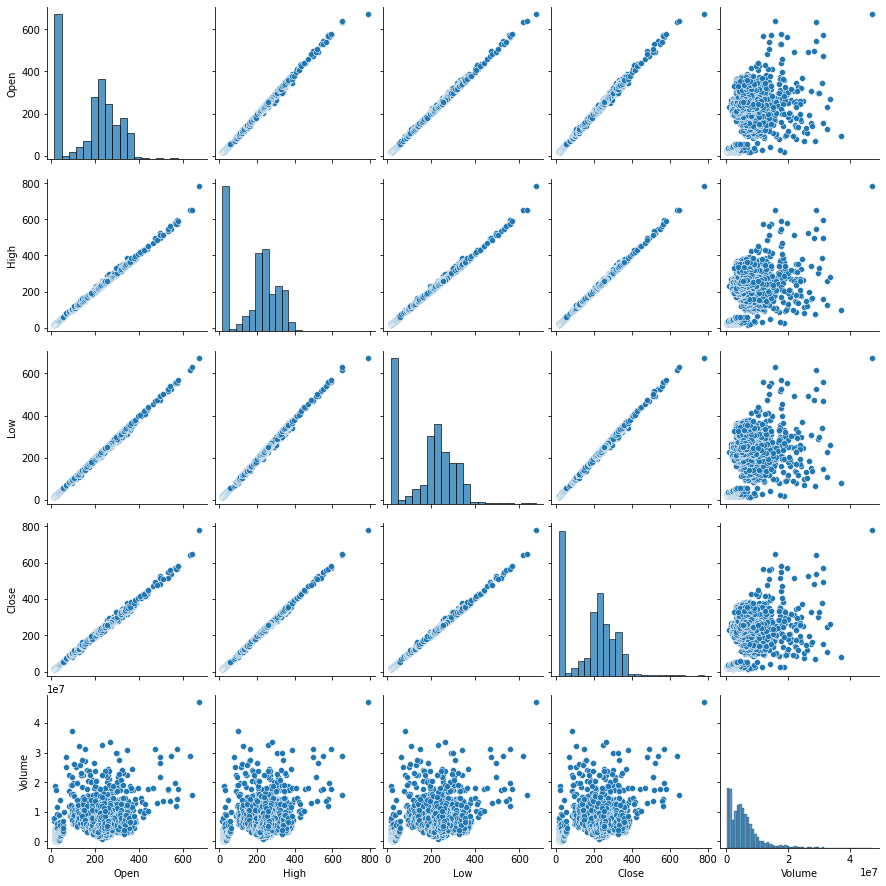

In [ ]:
sns.pairplot(data=df)

Open, High and Low parameters are more correlated with Close

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Aim is to predict the closing price of the stock based on the following feature:

1.Open

2.High

3.Low

4.Volume

'Date' column to be dropped as it is not needed here to predict the closing price of the prediction. Moreover it is a categorical data whereas others are of floating point type.


We'll also drop 'Adj Close' column since it haas same values as that of 'Close' column

In [4]:
df = df.drop(['Date'],axis=1)
df=df.drop(['Adj Close'],axis=1)

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
df.head(3)

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800


In [ ]:
df.tail(3)

,Open,High,Low,Close,Volume
2413,632.419983,650.880005,618.00000,640.809998,29005700
2414,640.000000,653.000000,632.52002,650.570007,15719300
2415,673.690002,786.140015,673.52002,780.000000,47065000


Using Scikit-learn

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X=df[['Open', 'High', 'Low','Volume']]
y=df['Close']

In [9]:
X

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2411,568.489990,576.809998,558.080017,11788500
2412,575.690002,589.799988,567.429993,17801500
2413,632.419983,650.880005,618.000000,29005700
2414,640.000000,653.000000,632.520020,15719300


In [ ]:
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

Creating training and testing data

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [11]:
#creating an instance of Linear Regression model
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [12]:
# The coefficients
print('Coefficients: \n', lrmodel.coef_)

Coefficients: 
 [-6.37615136e-01  8.59041324e-01  7.78186577e-01  9.30127197e-10]


**Interpreting the coefficients**



1.   A 1 unit rise in **Openning price** is associated with a **decrease of 0.637 (dollars)** in Closing price.
2.   A 1 unit rise in **Highest price** is associated with an **increase of 0.859 (dollars)** in Closing price.
1.  A 1 unit rise in **Lowest price** is associated with an **increase of 0.778 (dollars)** in Closing price.
2.   A 1 unit rise in **Volume of the trades taken** is associated with an **increase of 9.3*10^-10 (dollars)** in Closing price.






Predictions

In [14]:
pred = lrmodel.predict(x_test)

Text(0, 0.5, 'Predicted Y')

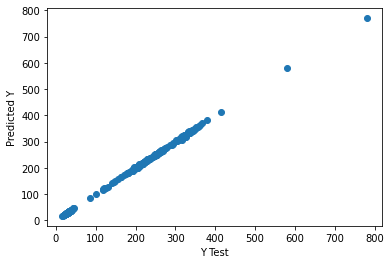

In [18]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**EVALUATION OF MODEL**

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.4275698559718044
MSE: 4.487426527715036
RMSE: 2.118354674674436


**Residuals**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


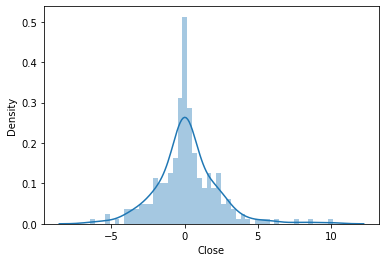

In [ ]:
sns.distplot((y_test-pred),bins=50);

Saving the model and predicting

In [ ]:
import pickle
pickle.dump(lrmodel,open('teslapred.pkl','wb'))
new_model=pickle.load(open('teslapred.pkl','rb'))
new_model.predict(np.array([20.000000,20.000000,15.830000,6866900]).reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.70602178])

In [ ]:
df.iloc[4]

Open      2.000000e+01
High      2.000000e+01
Low       1.583000e+01
Close     1.611000e+01
Volume    6.866900e+06
Name: 4, dtype: float64

Prediction value is 16.70 and actual closing value is 16.11